In [1]:
import math, numpy as np

In [2]:
import pandas as pd

In [3]:
from aux_plt import start_plotting

In [4]:
from matplotlib import pyplot as plt
import plot_df

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Data loading

In [6]:
df = pd.read_csv("pmf_precompute_objectives_posterior.py.csv")

In [7]:
df["log10(a)"] = df["a"].apply(math.log10)
df["log10(c)"] = df["c"].apply(math.log10)

In [8]:
# prior-optimal
a = 0.03289054
c = 0.00044727
K = 8
b = 0.007
d = 0.007

# 2D Slices

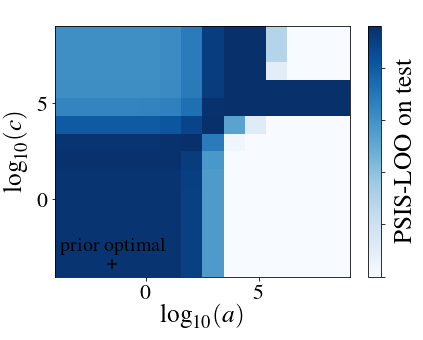

In [9]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('axes', titlesize=0)          # controls default text sizes
    
im = plot_df.plot_df2D(df[(df["log10(a)"]>=-4)&(df["log10(c)"]>=-4) ], x_feature1="log10(a)", x_feature2="log10(c)", kind="grid", 
                  y_feature_name="obj", label="PSIS-LOO on test", cmap="Blues", vmin=-3e8, vmax=-2.04e8)

plt.xlabel(r"$\log_{10}(a)$")
plt.ylabel(r"$\log_{10}(c)$")

plt.scatter([np.log10(a)],[np.log10(c)], color="black", marker="+", s=100)

#plt.plot([-9,9],[-9,9], color="lightgray", lw=2.5, ls="--", alpha=0.5)
#plt.text(2,-0.8,r"$\log_{10}(a) = \log_{10}(c)$", fontsize=18, rotation=40, ha="center", va="bottom",
#         color="lightgray", alpha=0.5)


plt.text(np.log10(a),np.log10(c)+0.5,r"prior optimal", fontsize=20, rotation=0, ha="center", va="bottom")
#plt.title(r"$K$=%s, $b$=%.3f, $d$=%.3f (prior optimal)" % (K,b,d), fontsize=20)


cbar = plt.gca().images[-1].colorbar   
cbar.ax.tick_params(labelcolor="white") 
cbar.ax.tick_params(labelsize=0) 
cbar.set_ticks([],[])

plt.subplots_adjust(left=0.15, right=0.95, top=0.925, bottom=0.2)    
plt.savefig("prior_posterior_73.pdf")
plt.show()

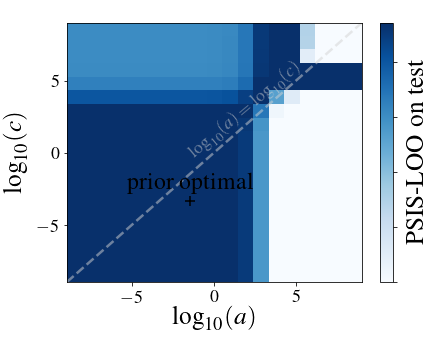

In [10]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('axes', titlesize=0)          # controls default text sizes
    
im = plot_df.plot_df2D(df, x_feature1="log10(a)", x_feature2="log10(c)", kind="grid", 
                  y_feature_name="obj", label="PSIS-LOO on test", cmap="Blues", vmin=-3e8, vmax=-2.06e8)

plt.xlabel(r"$\log_{10}(a)$")
plt.ylabel(r"$\log_{10}(c)$")

plt.scatter([np.log10(a)],[np.log10(c)], color="black", marker="+", s=100)

plt.plot([-9,9],[-9,9], color="lightgray", lw=2.5, ls="--", alpha=0.5)
plt.text(2,-0.8,r"$\log_{10}(a) = \log_{10}(c)$", fontsize=18, rotation=40, ha="center", va="bottom",
         color="lightgray", alpha=0.5)


plt.text(np.log10(a),np.log10(c)+0.5,r"prior optimal", fontsize=24, rotation=0, ha="center", va="bottom")
#plt.title(r"$K$=%s, $b$=%.3f, $d$=%.3f (prior optimal)" % (K,b,d), fontsize=20)


cbar = plt.gca().images[-1].colorbar   
cbar.ax.tick_params(labelcolor="white") 
cbar.ax.tick_params(labelsize=0) 
cbar.set_ticks([],[])

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("prior_posterior_73B.pdf")
plt.show()

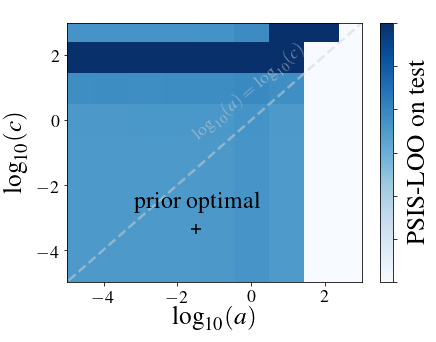

In [11]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('axes', titlesize=0)          # controls default text sizes
    
im = plot_df.plot_df2D(df, x_feature1="log10(a)", x_feature2="log10(c)", kind="grid", 
                  y_feature_name="obj", label="PSIS-LOO on test", cmap="Blues", vmin=-2.08e8, vmax=-2.05e8)

plt.xlabel(r"$\log_{10}(a)$")
plt.ylabel(r"$\log_{10}(c)$")

plt.scatter([np.log10(a)],[np.log10(c)], color="black", marker="+", s=100)

plt.plot([-9,9],[-9,9], color="lightgray", lw=2.5, ls="--", alpha=0.5)
plt.text(0,-0.8,r"$\log_{10}(a) = \log_{10}(c)$", fontsize=18, rotation=40, ha="center", va="bottom",
         color="lightgray", alpha=0.5)


plt.text(np.log10(a),np.log10(c)+0.5,r"prior optimal", fontsize=24, rotation=0, ha="center", va="bottom")
#plt.title(r"$K$=%s, $b$=%.3f, $d$=%.3f (prior optimal)" % (K,b,d), fontsize=20)


cbar = plt.gca().images[-1].colorbar   
cbar.ax.tick_params(labelcolor="white") 
cbar.ax.tick_params(labelsize=0) 
cbar.set_ticks([],[])

plt.xlim(-5,3)
plt.ylim(-5,3)

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("prior_posterior_73_1.pdf")
plt.show()

# Diagonal slice

In [12]:
def extract_diagonal_slice(df, minv=-9, maxv=9):
    args = range(minv, maxv, 1)
    means = []
    stds = []
    for v in args:
        log10a = log10c = v
        df_slice = df[(df["log10(a)"]==v) & (df["log10(c)"]==v)]["obj"]
        df_slice = np.array(df_slice)
        means.append( df_slice.mean() )
        stds.append( df_slice.std() )
    means, stds = np.array(means), np.array(stds)
    return args, means, stds

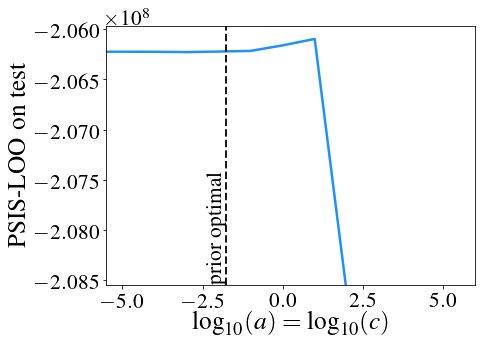

In [13]:
from aux_plt import start_plotting
    
import plot_primitives
start_plotting(cmbright=False)

args, means, stds = extract_diagonal_slice(df, -9, 3)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
plt.ylabel(r"$\text{PSIS-LOO}$ on test")
y1,y2 = plt.ylim();
plt.ylim(y1*0.999, y2)
plt.xlim(-5.5,6)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")

plt.xlabel(r"$\log_{10}(a) = \log_{10}(c)$")
#plt.title(r"$K$=%s, $b$=%.3f, $d$=%.3f" % (K,b,d), fontsize=20)

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("prior_posterior_73_diagonal1D_1.pdf")
plt.show()

<Figure size 460.8x345.6 with 0 Axes>

<Figure size 921.6x345.6 with 0 Axes>

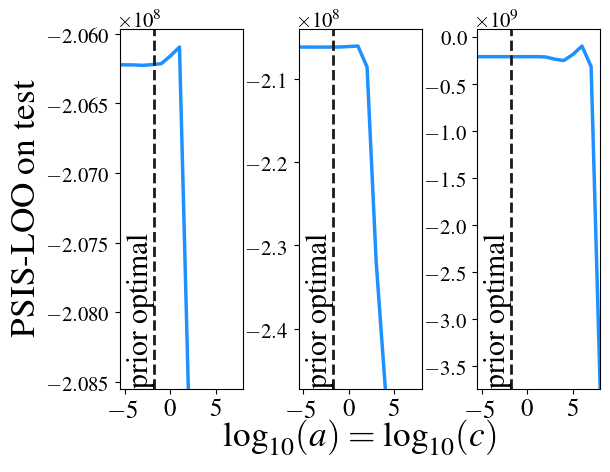

In [14]:
from aux_plt import start_plotting
    
import plot_primitives
start_plotting(cmbright=False)
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels

fig = plt.figure(figsize=(6.4*2, 4.8), dpi=72)

fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2, wspace = 0.45) 


plt.sca(axs[0])
args, means, stds = extract_diagonal_slice(df, -9, 3)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
plt.ylabel(r"$\text{PSIS-LOO}$ on test")
y1,y2 = plt.ylim();
plt.ylim(y1*0.999, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")


plt.sca(axs[1])
args, means, stds = extract_diagonal_slice(df, -9, 5)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
plt.xlabel(r"$\log_{10}(a) = \log_{10}(c)$")
y1,y2 = plt.ylim();
plt.ylim(y1*0.992, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")


plt.sca(axs[2])
args, means, stds = extract_diagonal_slice(df, -9, 9)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
y1,y2 = plt.ylim();
plt.ylim(y1*0.95, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")

plt.savefig("prior_posterior_73_diagonal1D.pdf")
plt.show()

<Figure size 460.8x345.6 with 0 Axes>

<Figure size 921.6x345.6 with 0 Axes>

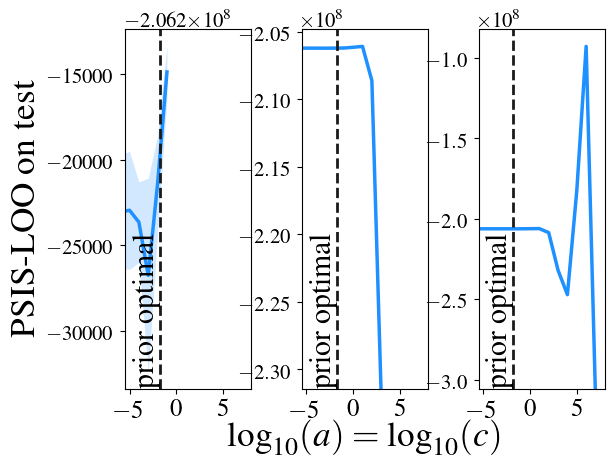

In [15]:
from aux_plt import start_plotting
    
import plot_primitives
start_plotting(cmbright=False)
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels

fig = plt.figure(figsize=(6.4*2, 4.8), dpi=72)

fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2, wspace = 0.4) 


plt.sca(axs[0])
args, means, stds = extract_diagonal_slice(df, -9, 0)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
plt.ylabel(r"$\text{PSIS-LOO}$ on test")
y1,y2 = plt.ylim();
#plt.ylim(y1*0.999, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")


plt.sca(axs[1])
args, means, stds = extract_diagonal_slice(df, -9, 4)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
plt.xlabel(r"$\log_{10}(a) = \log_{10}(c)$")
y1,y2 = plt.ylim();
plt.ylim(y1*0.992, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")


plt.sca(axs[2])
args, means, stds = extract_diagonal_slice(df, -9, 8)
plot_primitives.plot_err(args, means, stds, color="dodgerblue", lw=2.5, ls="-")
y1,y2 = plt.ylim();
plt.ylim(y1*0.95, y2)
plt.xlim(-5.5,8)
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2, ls="--")
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), y1, "prior optimal", rotation=90, ha="right", va="bottom")

plt.savefig("prior_posterior_73_diagonal1D_2.pdf")
plt.show()

# Horizontal slice

In [16]:
args = range(-9,9,1)
means = []
stds = []
log10c = -3
for v in args:
    df_slice = df[(df["log10(a)"]==v) & (df["log10(c)"]==log10c)]["obj"]
    df_slice = np.array(df_slice)
    means.append( df_slice.mean() )
    stds.append( df_slice.std() )
means, stds = np.array(means), np.array(stds)

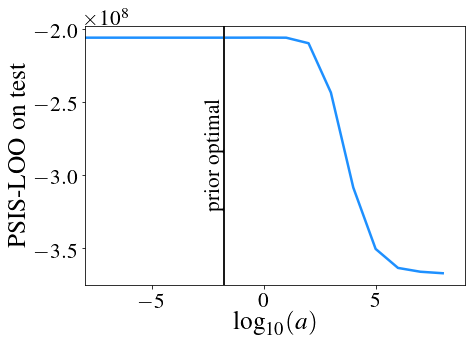

In [17]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.plot(args, means, lw=2.5, color="dodgerblue"); plt.ylabel(r"$\text{PSIS-LOO}$ on test")
plt.xlabel(r"$\log_{10}(a)$")
plt.axvline(math.log10(0.5*(a+c)), color="k", lw=2)
y1,y2 = plt.ylim(); plt.text(math.log10(0.5*(a+c)), 0.5*(y1+y2), "prior optimal", rotation=90, ha="right", va="center")
plt.xlim(-8,9)
plt.show()